### We are performing an EDA and feature engineering on the movielens dataset,using the following packages.

In [1]:
#importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#### •	Import the three datasets

In [2]:
#Movies.dat
#Format - MovieID::Title::Genres
#Format -  UserID::Gender::Age::Occupation::Zip-code
#Ratings.dat
#Format - UserID::MovieID::Rating::Timestamp



movies_df = pd.read_csv(
    'movies.dat',
    sep='::',
    names=['MovieID','Title','Genres'],
    header=None
)
users_df = pd.read_csv(
    'users.dat',
    sep='::',
    names=['UserID','Gender','Age', 'Occupation', 'zip-code'],
    header=None
)
ratings_df = pd.read_csv(
    'ratings.dat',
    sep='::',
    names=['UserID','MovieID','Rating', 'Timestamp'],
    parse_dates=['Timestamp'],
    header=None
)

In [3]:
ratings_df

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
...,...,...,...,...
1000204,6040,1091,1,956716541
1000205,6040,1094,5,956704887
1000206,6040,562,5,956704746
1000207,6040,1096,4,956715648


In [4]:
movies_df = pd.read_csv(
    'movies.dat',
    sep='::',
    names=['MovieID','Title','Genres'],
    header=None
)

In [5]:
movies_df

,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
3878,3948,Meet the Parents (2000),Comedy
3879,3949,Requiem for a Dream (2000),Drama
3880,3950,Tigerland (2000),Drama
3881,3951,Two Family House (2000),Drama


In [6]:
movies_df.shape

(3883, 3)

In [7]:
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6040 entries, 0 to 6039
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   UserID      6040 non-null   int64 
 1   Gender      6040 non-null   object
 2   Age         6040 non-null   int64 
 3   Occupation  6040 non-null   int64 
 4   zip-code    6040 non-null   object
dtypes: int64(3), object(2)
memory usage: 236.1+ KB


### •	Create a new dataset [Master_Data] with the following columns MovieID Title UserID Age Gender Occupation Rating. (Hint: (i) Merge two tables at a time. (ii) Merge the tables using two primary keys MovieID & UserId)

In [8]:
First_merge = pd.merge(movies_df,ratings_df,on='MovieID')
First_merge.head()


,MovieID,Title,Genres,UserID,Rating,Timestamp
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268
1,1,Toy Story (1995),Animation|Children's|Comedy,6,4,978237008
2,1,Toy Story (1995),Animation|Children's|Comedy,8,4,978233496
3,1,Toy Story (1995),Animation|Children's|Comedy,9,5,978225952
4,1,Toy Story (1995),Animation|Children's|Comedy,10,5,978226474


In [9]:
second_merge = pd.merge(users_df,First_merge,on='UserID')
second_merge.head()

,UserID,Gender,Age,Occupation,zip-code,MovieID,Title,Genres,Rating,Timestamp
0,1,F,1,10,48067,1,Toy Story (1995),Animation|Children's|Comedy,5,978824268
1,1,F,1,10,48067,48,Pocahontas (1995),Animation|Children's|Musical|Romance,5,978824351
2,1,F,1,10,48067,150,Apollo 13 (1995),Drama,5,978301777
3,1,F,1,10,48067,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,4,978300760
4,1,F,1,10,48067,527,Schindler's List (1993),Drama|War,5,978824195


In [10]:
#drop the zipcode and timestamp
master_data = second_merge.drop(['zip-code','Timestamp'],axis=1) #axis=1 means columns
master_data.head()

,UserID,Gender,Age,Occupation,MovieID,Title,Genres,Rating
0,1,F,1,10,1,Toy Story (1995),Animation|Children's|Comedy,5
1,1,F,1,10,48,Pocahontas (1995),Animation|Children's|Musical|Romance,5
2,1,F,1,10,150,Apollo 13 (1995),Drama,5
3,1,F,1,10,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,4
4,1,F,1,10,527,Schindler's List (1993),Drama|War,5


In [12]:
#Explore the datasets using visual representations (graphs or tables), also include your comments on the following:
#User Age Distribution

users_df['Age'].value_counts()


25    2096
35    1193
18    1103
45     550
50     496
56     380
1      222
Name: Age, dtype: int64

Text(0, 0.5, 'Count')

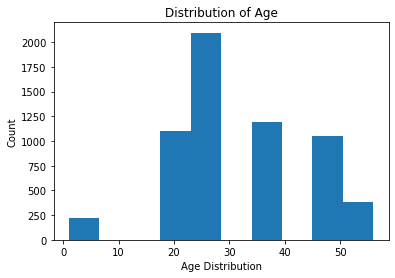

In [13]:
#creating a histogram for all unique ages:
plt.hist(users_df['Age'])
plt.xlabel('Age Distribution')
plt.title('Distribution of Age')
plt.ylabel('Count')


In [14]:
#2.User rating of the movie “Toy Story”
First_merge.head()

,MovieID,Title,Genres,UserID,Rating,Timestamp
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268
1,1,Toy Story (1995),Animation|Children's|Comedy,6,4,978237008
2,1,Toy Story (1995),Animation|Children's|Comedy,8,4,978233496
3,1,Toy Story (1995),Animation|Children's|Comedy,9,5,978225952
4,1,Toy Story (1995),Animation|Children's|Comedy,10,5,978226474


In [15]:
group = First_merge.groupby('Title')

In [16]:
group.head()

,MovieID,Title,Genres,UserID,Rating,Timestamp
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268
1,1,Toy Story (1995),Animation|Children's|Comedy,6,4,978237008
2,1,Toy Story (1995),Animation|Children's|Comedy,8,4,978233496
3,1,Toy Story (1995),Animation|Children's|Comedy,9,5,978225952
4,1,Toy Story (1995),Animation|Children's|Comedy,10,5,978226474
...,...,...,...,...,...,...
999821,3952,"Contender, The (2000)",Drama|Thriller,23,4,978461000
999822,3952,"Contender, The (2000)",Drama|Thriller,36,5,978062904
999823,3952,"Contender, The (2000)",Drama|Thriller,52,4,977947102
999824,3952,"Contender, The (2000)",Drama|Thriller,72,5,977868330


In [17]:
toy_story= group.get_group('Toy Story (1995)')

In [18]:
toy_story.head()

,MovieID,Title,Genres,UserID,Rating,Timestamp
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268
1,1,Toy Story (1995),Animation|Children's|Comedy,6,4,978237008
2,1,Toy Story (1995),Animation|Children's|Comedy,8,4,978233496
3,1,Toy Story (1995),Animation|Children's|Comedy,9,5,978225952
4,1,Toy Story (1995),Animation|Children's|Comedy,10,5,978226474


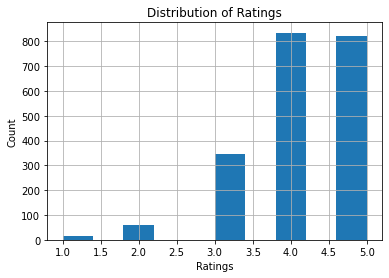

In [19]:
toy_story['Rating'].hist()
plt.xlabel('Ratings')
plt.title('Distribution of Ratings')
plt.ylabel('Count')
plt.show()

In [20]:
#3.	Top 25 movies by viewership rating
average_rating = First_merge.groupby('Title')['Rating'].mean()
average_rating.head(2)

Title
$1,000,000 Duck (1971)    3.027027
'Night Mother (1986)      3.371429
Name: Rating, dtype: float64

In [21]:
#to find movies with highest ratings
average_rating = average_rating.sort_values(ascending=False)
average_rating.head(25)

Title
Ulysses (Ulisse) (1954)                                                5.000000
Lured (1947)                                                           5.000000
Follow the Bitch (1998)                                                5.000000
Bittersweet Motel (2000)                                               5.000000
Song of Freedom (1936)                                                 5.000000
One Little Indian (1973)                                               5.000000
Smashing Time (1967)                                                   5.000000
Schlafes Bruder (Brother of Sleep) (1995)                              5.000000
Gate of Heavenly Peace, The (1995)                                     5.000000
Baby, The (1973)                                                       5.000000
I Am Cuba (Soy Cuba/Ya Kuba) (1964)                                    4.800000
Lamerica (1994)                                                        4.750000
Apple, The (Sib) (1998)           

In [22]:
#4.	Find the ratings for all the movies reviewed by for a particular user of user id = 2696
rattings_all_2696 = second_merge[second_merge['UserID']==2696]

In [23]:
rattings_all_2696

,UserID,Gender,Age,Occupation,zip-code,MovieID,Title,Genres,Rating,Timestamp
440667,2696,M,25,7,24210,350,"Client, The (1994)",Drama|Mystery|Thriller,3,973308886
440668,2696,M,25,7,24210,800,Lone Star (1996),Drama|Mystery,5,973308842
440669,2696,M,25,7,24210,1092,Basic Instinct (1992),Mystery|Thriller,4,973308886
440670,2696,M,25,7,24210,1097,E.T. the Extra-Terrestrial (1982),Children's|Drama|Fantasy|Sci-Fi,3,973308690
440671,2696,M,25,7,24210,1258,"Shining, The (1980)",Horror,4,973308710
440672,2696,M,25,7,24210,1270,Back to the Future (1985),Comedy|Sci-Fi,2,973308676
440673,2696,M,25,7,24210,1589,Cop Land (1997),Crime|Drama|Mystery,3,973308865
440674,2696,M,25,7,24210,1617,L.A. Confidential (1997),Crime|Film-Noir|Mystery|Thriller,4,973308842
440675,2696,M,25,7,24210,1625,"Game, The (1997)",Mystery|Thriller,4,973308842
440676,2696,M,25,7,24210,1644,I Know What You Did Last Summer (1997),Horror|Mystery|Thriller,2,973308920


In [24]:
#1.	Find out all the unique genres 
First_merge['Genres'].value_counts().head(10)

Comedy                     116883
Drama                      111423
Comedy|Romance              42712
Comedy|Drama                42245
Drama|Romance               29170
Action|Thriller             26759
Horror                      22563
Drama|Thriller              18248
Thriller                    17851
Action|Adventure|Sci-Fi     17783
Name: Genres, dtype: int64

In [25]:
First_merge['Genres'].unique()

array(["Animation|Children's|Comedy", "Adventure|Children's|Fantasy",
       'Comedy|Romance', 'Comedy|Drama', 'Comedy',
       'Action|Crime|Thriller', "Adventure|Children's", 'Action',
       'Action|Adventure|Thriller', 'Comedy|Drama|Romance',
       'Comedy|Horror', "Animation|Children's", 'Drama',
       'Action|Adventure|Romance', 'Drama|Thriller', 'Drama|Romance',
       'Thriller', 'Action|Comedy|Drama', 'Crime|Drama|Thriller',
       'Drama|Sci-Fi', 'Romance', 'Adventure|Sci-Fi', 'Adventure|Romance',
       "Children's|Comedy|Drama", 'Documentary', 'Drama|War',
       'Action|Crime|Drama', 'Action|Adventure', 'Crime|Thriller',
       "Animation|Children's|Musical|Romance", "Children's|Comedy",
       'Drama|Mystery', 'Sci-Fi|Thriller',
       'Action|Comedy|Crime|Horror|Thriller', 'Drama|Musical',
       'Crime|Drama|Romance', 'Adventure|Drama', 'Action|Thriller',
       "Adventure|Children's|Comedy|Musical", 'Action|Drama|War',
       'Action|Adventure|Crime', 'Crime', 'Drama

In [26]:
#2.	Create a separate column for each genre category with a one-hot encoding ( 1 and 0) 
#whether or not the movie belongs to that genre. 
genrecol =First_merge['Genres']
genre= genrecol.str.get_dummies().add_prefix('NEW')


In [27]:
genrecol.head()

0    Animation|Children's|Comedy
1    Animation|Children's|Comedy
2    Animation|Children's|Comedy
3    Animation|Children's|Comedy
4    Animation|Children's|Comedy
Name: Genres, dtype: object

In [28]:
First_merge.head()

,MovieID,Title,Genres,UserID,Rating,Timestamp
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268
1,1,Toy Story (1995),Animation|Children's|Comedy,6,4,978237008
2,1,Toy Story (1995),Animation|Children's|Comedy,8,4,978233496
3,1,Toy Story (1995),Animation|Children's|Comedy,9,5,978225952
4,1,Toy Story (1995),Animation|Children's|Comedy,10,5,978226474


In [29]:
final_data = pd.concat([First_merge,genre],axis=1)

In [30]:
final_data.head()

,MovieID,Title,Genres,UserID,Rating,Timestamp,NEWAction,NEWAdventure,NEWAnimation,NEWChildren's,...,NEWFantasy,NEWFilm-Noir,NEWHorror,NEWMusical,NEWMystery,NEWRomance,NEWSci-Fi,NEWThriller,NEWWar,NEWWestern
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,1,Toy Story (1995),Animation|Children's|Comedy,6,4,978237008,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
2,1,Toy Story (1995),Animation|Children's|Comedy,8,4,978233496,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
3,1,Toy Story (1995),Animation|Children's|Comedy,9,5,978225952,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
4,1,Toy Story (1995),Animation|Children's|Comedy,10,5,978226474,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0


In [31]:
final_data.columns

Index(['MovieID', 'Title', 'Genres', 'UserID', 'Rating', 'Timestamp',
       'NEWAction', 'NEWAdventure', 'NEWAnimation', 'NEWChildren's',
       'NEWComedy', 'NEWCrime', 'NEWDocumentary', 'NEWDrama', 'NEWFantasy',
       'NEWFilm-Noir', 'NEWHorror', 'NEWMusical', 'NEWMystery', 'NEWRomance',
       'NEWSci-Fi', 'NEWThriller', 'NEWWar', 'NEWWestern'],
      dtype='object')

In [32]:
final_data.to_csv('final_data.csv')

In [56]:
master_data.columns

Index(['UserID', 'Gender', 'Age', 'Occupation', 'MovieID', 'Title', 'Genres',
       'Rating'],
      dtype='object')

In [72]:
#4.Develop an appropriate model to predict the movie ratings
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [73]:
X = final_data.drop(['Rating','Title','MovieID','UserID','Timestamp','Genres'],axis=1)
y= final_data['Rating']

In [74]:
X.columns

Index(['NEWAction', 'NEWAdventure', 'NEWAnimation', 'NEWChildren's',
       'NEWComedy', 'NEWCrime', 'NEWDocumentary', 'NEWDrama', 'NEWFantasy',
       'NEWFilm-Noir', 'NEWHorror', 'NEWMusical', 'NEWMystery', 'NEWRomance',
       'NEWSci-Fi', 'NEWThriller', 'NEWWar', 'NEWWestern'],
      dtype='object')

In [75]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=0)

In [76]:
linear_reg=LinearRegression()

In [77]:
linear_reg.fit(X_train,y_train)

LinearRegression()

In [78]:
#predictions
y_pred= linear_reg.predict(X_test)

In [79]:
#to find the most important features
linear_reg.coef_

array([-0.10259894,  0.01484072,  0.36292453, -0.3215857 , -0.01624118,
        0.09633733,  0.40940027,  0.23650902,  0.06420402,  0.4467839 ,
       -0.28896811,  0.16319447,  0.01412358, -0.00614819, -0.02582426,
        0.05733083,  0.29962257,  0.12561833])

In [71]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test,y_pred)
print(r2)

0.036632192843985


In [52]:
#3.	Determine the features affecting the ratings of any particular movie.
data=pd.DataFrame(master_data)

In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000209 entries, 0 to 1000208
Data columns (total 8 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   UserID      1000209 non-null  int64 
 1   Gender      1000209 non-null  object
 2   Age         1000209 non-null  int64 
 3   Occupation  1000209 non-null  int64 
 4   MovieID     1000209 non-null  int64 
 5   Title       1000209 non-null  object
 6   Genres      1000209 non-null  object
 7   Rating      1000209 non-null  int64 
dtypes: int64(5), object(3)
memory usage: 68.7+ MB


In [55]:
print(data.corr()) #pearson correlation coefficient

              UserID       Age  Occupation   MovieID    Rating
UserID      1.000000  0.034688   -0.026698 -0.017739  0.012303
Age         0.034688  1.000000    0.078371  0.027575  0.056869
Occupation -0.026698  0.078371    1.000000  0.008585  0.006753
MovieID    -0.017739  0.027575    0.008585  1.000000 -0.064042
Rating      0.012303  0.056869    0.006753 -0.064042  1.000000
